In [422]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [430]:
n_task_per_file = 20
n_files = 10
base_dir = "noise_sd=10/vary_r_noisesd_10.0_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [431]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [432]:
coverage_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8
0,1.00,1.00,1.000000,0.750000,1.00,1.00,1.00,0.75
1,0.75,1.00,1.000000,0.750000,1.00,1.00,1.00,1.00
2,1.00,1.00,1.000000,0.500000,1.00,0.50,0.75,1.00
3,1.00,0.75,1.000000,1.000000,1.00,1.00,1.00,1.00
4,0.75,0.75,0.750000,0.333333,0.75,0.75,0.75,0.75
...,...,...,...,...,...,...,...,...
15,1.00,1.00,1.000000,1.000000,1.00,1.00,0.75,1.00
16,0.75,1.00,1.000000,0.750000,1.00,1.00,1.00,1.00
17,0.75,0.75,0.333333,0.750000,0.75,0.75,0.50,0.50
18,0.50,0.50,0.500000,0.250000,0.75,0.50,0.75,1.00


In [433]:
length_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8
0,2.027833,2.760237,1.888161,2.185874,2.147034,2.044013,2.333848,2.084923
1,2.616675,2.215007,2.335980,2.370133,2.148647,2.056886,2.141994,1.997492
2,1.996876,2.489632,2.308980,2.404283,2.154016,2.122864,2.285592,2.045615
3,2.672461,2.453657,2.207906,2.188502,2.157241,2.166486,1.711940,2.222173
4,2.365412,2.496929,2.522710,2.071600,2.097724,2.285162,2.078588,2.031658
...,...,...,...,...,...,...,...,...
15,2.450975,2.282379,2.214088,1.832828,2.219469,2.009411,1.890799,1.816753
16,2.463454,2.545424,2.207495,2.345011,2.074111,1.945827,2.175557,1.981698
17,2.349014,2.429599,2.262630,2.370888,2.349494,2.214604,2.034457,1.859368
18,2.520344,2.327088,2.517133,2.549564,2.259455,2.106743,2.164876,1.916389


In [434]:
MSE_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8
0,9.677280,9.101807,8.501945,8.330099,5.973733,9.475808,6.386873,6.006523
1,4.777781,5.732823,6.533359,6.925288,5.053864,6.143281,5.816289,5.219731
2,5.650687,4.696600,4.851385,5.150396,4.936253,4.698016,5.405156,6.293713
3,7.353713,6.280431,5.517674,5.839976,6.356878,6.805858,9.103036,4.192131
4,8.970070,7.226653,7.844281,8.477925,8.016232,8.279903,6.632062,9.856253
...,...,...,...,...,...,...,...,...
15,5.584242,4.339244,5.856400,6.859637,5.648787,6.049862,6.748475,5.208343
16,5.569454,5.057689,6.169272,6.245495,5.384872,5.705490,5.347868,5.892124
17,6.391447,7.828692,6.952997,8.696023,7.228398,7.001763,7.388629,7.212140
18,5.559156,6.266938,5.023674,5.438089,5.691483,5.778859,6.119483,4.483376


In [435]:
def boxplots(dfs, metrics):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i], showmeans=True)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        """for j, mean in enumerate(means):
            print(j, mean)
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean"""
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
        elif metric == "Length":
            axes[i].set_ylim(0,20)
        elif metric == "MSE":
            axes[i].set_ylim(0,10)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 0.1    0.858333
0.2    0.859583
0.3    0.853750
0.4    0.846250
0.5    0.868750
0.6    0.867500
0.7    0.909583
0.8    0.918750
dtype: float64
Length :
 0.1    2.395243
0.2    2.354117
0.3    2.290569
0.4    2.250611
0.5    2.167990
0.6    2.139450
0.7    2.077084
0.8    2.036028
dtype: float64
MSE :
 0.1    6.757202
0.2    6.639541
0.3    6.675721
0.4    6.762384
0.5    6.665231
0.6    6.922350
0.7    6.633949
0.8    6.535730
dtype: float64


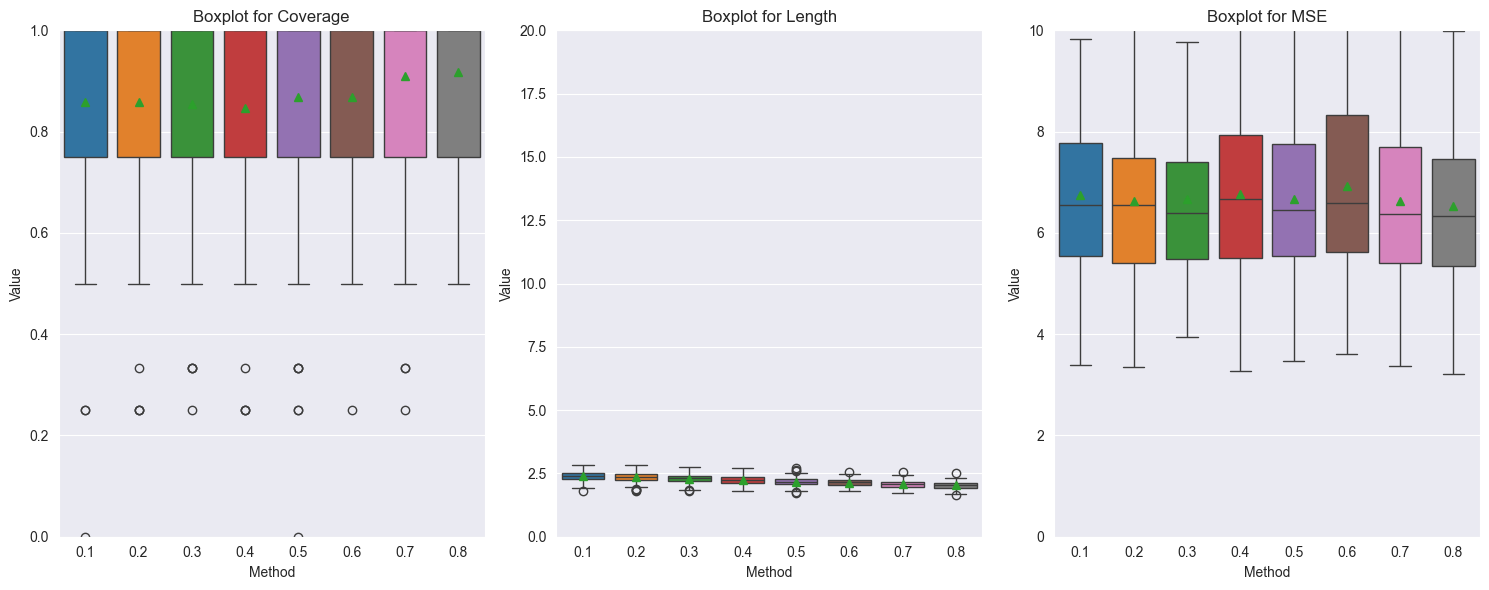

In [436]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])

In [155]:
coverage_df

,5.00,10.00,20.00,0.05,0.10,0.20
0,0.714286,1.000000,1.000000,1.000000,1.000000,0.833333
1,0.833333,0.833333,0.833333,1.000000,1.000000,0.500000
2,0.500000,0.833333,1.000000,0.333333,0.833333,0.833333
3,0.833333,1.000000,0.857143,0.500000,0.833333,1.000000
4,0.600000,1.000000,0.800000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...
4,1.000000,1.000000,1.000000,1.000000,0.833333,0.833333
5,0.833333,1.000000,1.000000,0.857143,0.600000,0.833333
6,1.000000,1.000000,1.000000,0.800000,0.833333,1.000000
7,1.000000,1.000000,1.000000,0.166667,1.000000,0.800000


In [397]:
a = np.random.multivariate_normal(mean=np.zeros(3), cov=np.eye(3), size=10)

In [403]:
a

array([[ 1.06793651,  1.36987016,  0.38254673],
       [-0.00676015,  0.04964653,  0.54545289],
       [ 0.36283111,  1.14141412, -0.09072415],
       [-0.35752269,  0.12027834,  1.73155615],
       [-0.2604219 , -0.41158687,  0.85320342],
       [-0.06342349,  0.26980504,  0.54805346],
       [ 3.11418919, -0.40739602,  0.14077256],
       [-1.10491165,  0.58322557, -0.02100113],
       [ 1.94883554,  0.87846771, -0.46144371],
       [-1.41438826,  0.90600893,  1.3235796 ]])

In [406]:
a.max(axis=1) < 1

array([False,  True, False, False,  True,  True, False,  True, False,
       False])

In [410]:
a.min(axis=1) > -1

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False])

In [413]:
np.logical_and(a.min(axis=1) > -1, a.max(axis=1) < 1).sum()

np.int64(3)